In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mt-cars/Lesson 3 Practice/Salaries.csv
/kaggle/input/mt-cars/Lesson 3 Practice/mtcars.csv


In [2]:
# Import analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
car_data = pd.read_csv("../input/mt-cars/Lesson 3 Practice/mtcars.csv")

In [5]:
car_data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [7]:
car_data.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

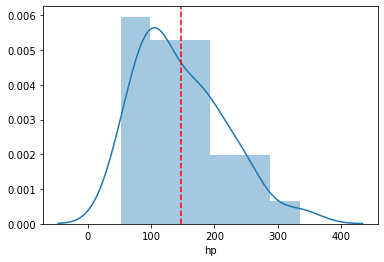

In [8]:
sns.distplot(car_data['hp'])
plt.axvline(car_data['hp'].values.mean(), linestyle='dashed', color='red')

Average of Horsepower is about 150 HP

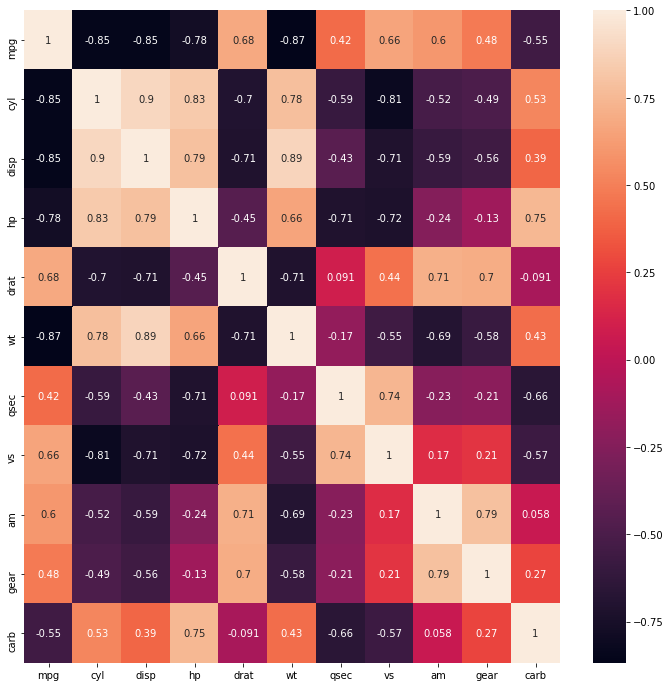

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(car_data.corr(), annot=True)

Columns that have positive correlation with horsepower is cyl, disp, wt,carb

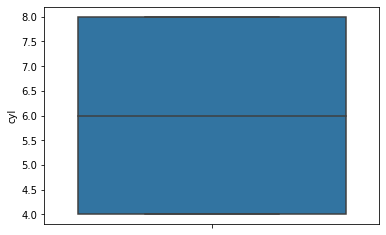

In [10]:
sns.boxplot(y='cyl', data=car_data)

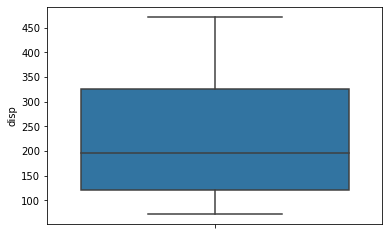

In [11]:
sns.boxplot(y='disp', data=car_data)

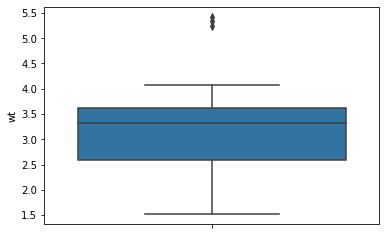

In [12]:
sns.boxplot(y='wt', data=car_data)

In [13]:
car_wt =  car_data['wt']
cwt_Q1 = car_wt.quantile(0.25)
cwt_Q3 = car_wt.quantile(0.75)
cwt_iqr = cwt_Q3 - cwt_Q1
cwt_upper = cwt_Q3 + (1.5 * cwt_iqr)
cwt_lower = cwt_Q1 - (1.5 * cwt_iqr)

In [14]:
wt_outlier = car_wt[(car_wt < cwt_lower) | (car_wt > cwt_upper)]

In [15]:
wt_outlier

14    5.250
15    5.424
16    5.345
Name: wt, dtype: float64

In [16]:
car_data[14:17]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4


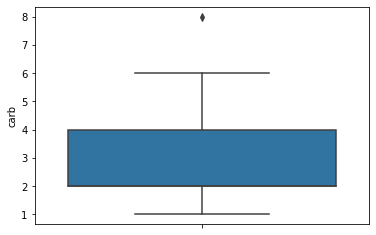

In [17]:
sns.boxplot(y='carb', data=car_data)

In [18]:
car_carb =  car_data['carb']
ccarb_Q1 = car_carb.quantile(0.25)
ccarb_Q3 = car_carb.quantile(0.75)
ccarb_iqr = ccarb_Q3 - ccarb_Q1
ccarb_upper = ccarb_Q3 + (1.5 * ccarb_iqr)
ccarb_lower = ccarb_Q1 - (1.5 * ccarb_iqr)

In [19]:
carb_outlier = car_carb[(car_carb < ccarb_lower) | (car_carb > ccarb_upper)]
carb_outlier

30    8
Name: carb, dtype: int64

In [20]:
car_data[car_data['carb'] == 8]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


In [21]:
new_car_data = car_data.drop([14,15,16,30])

In [22]:
new_car_data

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [23]:
car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900
cyl,32.0,6.187500,1.785922,4.000,4.00000,6.000,8.00,8.000
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900
vs,32.0,0.437500,0.504016,0.000,0.00000,0.000,1.00,1.000
am,32.0,0.406250,0.498991,0.000,0.00000,0.000,1.00,1.000
gear,32.0,3.687500,0.737804,3.000,3.00000,4.000,4.00,5.000


In [24]:
new_car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,28.0,21.157143,5.615483,13.300,17.07500,20.35,23.200,33.90
cyl,28.0,5.928571,1.762334,4.000,4.00000,6.00,8.000,8.00
disp,28.0,203.932143,104.804852,71.100,120.25000,163.80,282.850,400.00
hp,28.0,132.464286,57.604322,52.000,94.50000,111.50,175.000,264.00
drat,28.0,3.656786,0.538276,2.760,3.13250,3.75,3.960,4.93
wt,28.0,2.977250,0.730611,1.513,2.42875,3.18,3.475,4.07
qsec,28.0,17.976429,1.803037,14.500,16.89250,17.80,19.035,22.90
vs,28.0,0.500000,0.509175,0.000,0.00000,0.50,1.000,1.00
am,28.0,0.428571,0.503953,0.000,0.00000,0.00,1.000,1.00
gear,28.0,3.714286,0.712697,3.000,3.00000,4.00,4.000,5.00


In [25]:
car_data.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

# Create and Evaluate Model with some outlier

In [26]:
selected_columns = ['cyl', 'disp', 'wt', 'carb']
X = car_data[selected_columns]

In [27]:
X.head()

,cyl,disp,wt,carb
0,6,160.0,2.620,4
1,6,160.0,2.875,4
2,4,108.0,2.320,1
3,6,258.0,3.215,1
4,8,360.0,3.440,2


In [28]:
y = car_data['hp']

In [29]:
y.head()

0    110
1    110
2     93
3    110
4    175
Name: hp, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 41)

In [31]:
linreg = LinearRegression()

In [32]:
linreg.fit(X_train,y_train)

LinearRegression()

In [33]:
print("Model Intercept : ", linreg.intercept_)
print("Model coefficient : ", linreg.coef_)

Model Intercept :  63.444739715938496
Model coefficient :  [ -9.34665106   0.64213349 -22.39759     24.55050587]


In [34]:
hp_pred = linreg.predict(X_test)

In [35]:
print("Result with not removing outlier")
print("MAE :", mean_absolute_error(y_test,hp_pred))
print("MSE :", mean_squared_error(y_test, hp_pred))
print("R2 :", r2_score(y_test,hp_pred))

Result with not removing outlier
MAE : 28.816132039437843
MSE : 1130.095662484194
R2 : 0.6974057652752453


# Model with Cleaning outlier

In [36]:
new_X = new_car_data[selected_columns]
new_y = new_car_data['hp']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(new_X,
                                                    new_y,
                                                    test_size = 0.3,
                                                    random_state = 41)

In [38]:
new_lr = LinearRegression()

In [39]:
new_lr.fit(X_train,y_train)

LinearRegression()

In [40]:
print("Model Intercept : ", new_lr.intercept_)
print("Model coefficient : ", new_lr.coef_)

Model Intercept :  64.82323793168368
Model coefficient :  [-11.35155798   0.6497602  -15.08694084  19.8208859 ]


In [41]:
new_hp_pred = new_lr.predict(X_test)

In [42]:
print("Result with remove outlier")
print("MAE :", mean_absolute_error(y_test,new_hp_pred))
print("MSE :", mean_squared_error(y_test, new_hp_pred))
print("R2 :", r2_score(y_test,new_hp_pred))

Result with remove outlier
MAE : 22.528539399589608
MSE : 701.5446499125713
R2 : 0.810109484170805
